In [11]:
import tftb as wv
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import math


(array([[ 0.        ,  0.9045085 , -0.77254249, ...,  0.52246827,
          0.15412314,  0.01570842],
        [ 0.        ,  0.9045085 , -0.77252042, ...,  0.52245191,
          0.15412132,  0.01570842],
        [ 0.        ,  0.9045085 , -0.77245421, ...,  0.52240282,
          0.15411586,  0.01570842],
        ...,
        [ 0.        ,  0.9045085 , -0.77234387, ...,  0.52232102,
          0.15410675,  0.01570842],
        [ 0.        ,  0.9045085 , -0.77245421, ...,  0.52240282,
          0.15411586,  0.01570842],
        [ 0.        ,  0.9045085 , -0.77252042, ...,  0.52245191,
          0.15412132,  0.01570842]]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        

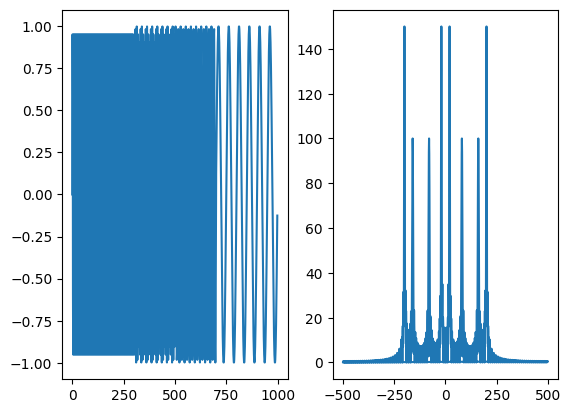

In [84]:

fs = 1000
signal_freq=[200, 160, 80, 20]
duration = [0.3,0.2,0.2,0.3]

signal = np.array([])
for i,freq in enumerate(signal_freq):
    num_sample=round(duration[i]*fs)
    time_step=np.linspace(0,duration[i],int(num_sample),endpoint=False)
    sin_signal_temp = np.sin(2*np.pi*time_step*freq)
    signal = np.concatenate((signal, sin_signal_temp))

plt.figure(1)
plt.subplot(1,2,1)
plt.plot(signal)
FFT_Signal=np.fft.fft(signal)
Freq_index=np.fft.fftfreq(len(signal),1/fs)
plt.subplot(1,2,2)
plt.plot(Freq_index,abs(FFT_Signal))

# wvd = wv.processing.WignerVilleDistribution(signal)
swvd = wv.processing.smoothed_pseudo_wigner_ville(signal)
wvd=wv.processing.WignerVilleDistribution(signal)
wvd.run()

# wvd.plot(kind='contour', extent=[0, 1, 0, fs / 2])
# plt.title("Wigner-Ville Distribution")
# plt.xlabel("Time (seconds)")
# plt.ylabel("Frequency (Hz)")


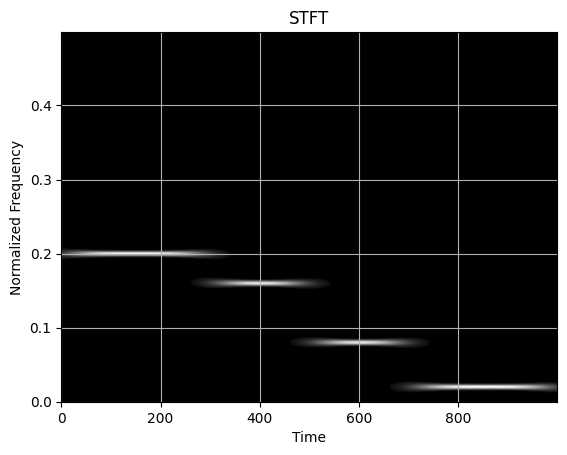

In [85]:
STFT=wv.processing.linear.ShortTimeFourierTransform(signal)
STFT.run()

STFT.plot()

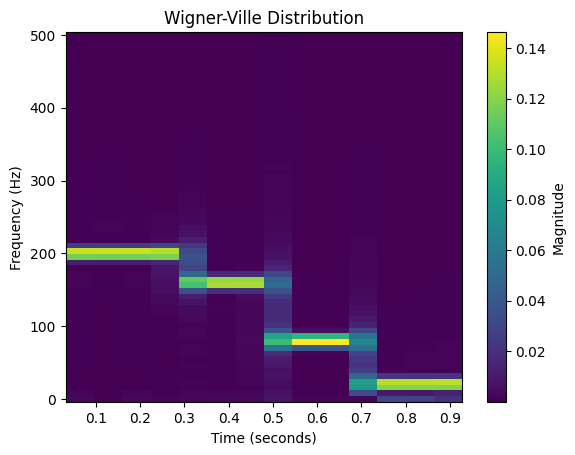

In [94]:
# error=100*np.random.normal(size=9999)
# print(np.std(error))
# print(np.sqrt(np.mean(error**2)))

frequencies, times, wvd = sig.spectrogram(signal, fs=fs, nperseg=128, noverlap=64, window='hamming', mode='complex')
plt.pcolormesh(times, frequencies, np.abs(wvd), shading='auto')
plt.title('Wigner-Ville Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.show()

In [95]:
time_step=np.linspace(0,sum(duration),int(sum(duration)*fs))
# frequency_index=np.linspace(0,fs,len(time_step))
frequency_index=np.fft.fftfreq(len(time_step),1/fs)
[x,y]=np.meshgrid(time_step,frequency_index)
plt.figure(2)
plt.colormesh(x,y,np.abs(swvd))
plt.colorbar()
plt.xlabel('Time(s)')
plt.ylabel('Freq (Hz)')
# plt.ylim((0,fs/2))
plt.grid(1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'colormesh'

<Figure size 640x480 with 0 Axes>